# **ACTIVIDAD DE EVALUACIÓN:** Despliegue de un servicio entrenado a partir de una base de datos SQL

## Importación de librerías

In [26]:
import pyodbc
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## Conexión y descarga de la base de datos

### Conexión

In [27]:
import json
#contraseña = open("my_passwd.json", "r")
#YOUR_PASSWORD = json.load(contraseña) #json es sólo el string de su contraseña.
#contraseña.close()

# Set up your connection string
with open('keys.json') as config_file:
    config = json.load(config_file)

server = config['server']
database = config['database']
username = config['username']
password = config['password']

# Define the connection string for SQL Server (Azure)
conn_str = (
    f'DRIVER={{ODBC Driver 18 for SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'UID={username};'
    f'PWD={password}'
)

# Establish the connection
try:
    conn = pyodbc.connect(conn_str)
    print("Connected to the Azure SQL Database successfully!")

except pyodbc.Error as e:
    print(f"Error connecting to the database: {e}")

Connected to the Azure SQL Database successfully!


### Descarga de datos

In [28]:
query = "SELECT * FROM SalesLT.customer"

datos = pd.read_sql(query, conn)

datos

C:\Users\danyj\AppData\Local\Temp\ipykernel_16228\4226397261.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  datos = pd.read_sql(query, conn)


,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson,EmailAddress,Phone,PasswordHash,PasswordSalt,rowguid,ModifiedDate
0,1,False,Mr.,Orlando,N.,Gee,None,A Bike Store,adventure-works\pamela0,orlando0@adventure-works.com,245-555-0173,L/Rlwxzp4w7RWmEgXX+/A7cXaePEPcp+KwQhl2fJL7w=,1KjXYs4=,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2005-08-01
1,2,False,Mr.,Keith,None,Harris,None,Progressive Sports,adventure-works\david8,keith0@adventure-works.com,170-555-0127,YPdtRdvqeAhj6wyxEsFdshBDNXxkCXn+CRgbvJItknw=,fs1ZGhY=,E552F657-A9AF-4A7D-A645-C429D6E02491,2006-08-01
2,3,False,Ms.,Donna,F.,Carreras,None,Advanced Bike Components,adventure-works\jillian0,donna0@adventure-works.com,279-555-0130,LNoK27abGQo48gGue3EBV/UrlYSToV0/s87dCRV7uJk=,YTNH5Rw=,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2005-09-01
3,4,False,Ms.,Janet,M.,Gates,None,Modular Cycle Systems,adventure-works\jillian0,janet1@adventure-works.com,710-555-0173,ElzTpSNbUW1Ut+L5cWlfR7MF6nBZia8WpmGaQPjLOJA=,nm7D5e4=,FF862851-1DAA-4044-BE7C-3E85583C054D,2006-07-01
4,5,False,Mr.,Lucy,None,Harrington,None,Metropolitan Sports Supply,adventure-works\shu0,lucy0@adventure-works.com,828-555-0186,KJqV15wsX3PG8TS5GSddp6LFFVdd3CoRftZM/tP0+R4=,cNFKU4w=,83905BDC-6F5E-4F71-B162-C98DA069F38A,2006-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,30113,False,Mr.,Raja,D.,Venugopal,None,Nearby Cycle Shop,adventure-works\jae0,raja0@adventure-works.com,1 (11) 500 555-0195,lx5a4+AFGzH6mzjz6hpiR9scxbYGX8OcqFpv/cI6yFs=,hSwmBWk=,84975C44-DC82-49D3-BFC4-8F31B4C8E994,2006-09-01
843,30115,False,Ms.,Dora,P.,Verdad,None,Retreat Inn,adventure-works\josé1,dora0@adventure-works.com,155-555-0140,RgzxIE8hSY/z6iJnmDYMZWdJTQBRaWKI7UaZhAPhPxY=,jYD20wc=,E4CF8FD5-30A4-4B8E-8FD8-47032E255778,2006-08-01
844,30116,False,Ms.,Wanda,F.,Vernon,None,Technical Parts Manufacturing,adventure-works\shu0,wanda0@adventure-works.com,433-555-0168,hNQpZV8787KyeDWfllnZWzY+l8DFEYTnwoZZzYtusi0=,HDCU1Bk=,EC409609-D25D-41B8-9D15-A1AA6E89FC77,2007-07-01
845,30117,False,Mr.,Robert,R.,Vessa,None,Totes & Baskets Company,adventure-works\jillian0,robert13@adventure-works.com,560-555-0171,UWGC2U8F7AUNA2FuiT4agrBoxAFskHGQSxqP39B7zLQ=,iES3IZA=,6F08E2FB-1CD3-4F6E-A2E6-385669598B19,2005-08-01


In [29]:
# Opcional: guardar los datos localmente

# datos.to_csv("salesLT_costumer.csv", index = false)

In [30]:
# Cerrar conexión

conn.close()

## Modelo

### EDA

In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    847 non-null    int64         
 1   NameStyle     847 non-null    bool          
 2   Title         840 non-null    object        
 3   FirstName     847 non-null    object        
 4   MiddleName    504 non-null    object        
 5   LastName      847 non-null    object        
 6   Suffix        48 non-null     object        
 7   CompanyName   847 non-null    object        
 8   SalesPerson   847 non-null    object        
 9   EmailAddress  847 non-null    object        
 10  Phone         847 non-null    object        
 11  PasswordHash  847 non-null    object        
 12  PasswordSalt  847 non-null    object        
 13  rowguid       847 non-null    object        
 14  ModifiedDate  847 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1),

In [32]:
# Ver valores faltantes

datos.isna().sum()

CustomerID        0
NameStyle         0
Title             7
FirstName         0
MiddleName      343
LastName          0
Suffix          799
CompanyName       0
SalesPerson       0
EmailAddress      0
Phone             0
PasswordHash      0
PasswordSalt      0
rowguid           0
ModifiedDate      0
dtype: int64

In [33]:
print("Fecha más antigua:", datos["ModifiedDate"].min())
print("Fecha más reciente:", datos["ModifiedDate"].max())

Fecha más antigua: 2005-07-01 00:00:00
Fecha más reciente: 2009-05-16 16:33:33.123000


### Limpieza de datos

In [34]:
# Se eliminan columnas que no se consideran relevantes

In [35]:
# Se imputan valores faltantes

suffix_mode = datos["Title"].mode()[0]
datos["Title"].fillna(suffix_mode, inplace = True)

suffix_mode = datos["Suffix"].mode()[0]
datos["Suffix"].fillna(suffix_mode, inplace = True)

suffix_mode = datos["MiddleName"].mode()[0]
datos["MiddleName"].fillna(suffix_mode, inplace = True)


In [36]:
# Verificar que se hayan corregido los datos 

datos.isna().sum()

CustomerID      0
NameStyle       0
Title           0
FirstName       0
MiddleName      0
LastName        0
Suffix          0
CompanyName     0
SalesPerson     0
EmailAddress    0
Phone           0
PasswordHash    0
PasswordSalt    0
rowguid         0
ModifiedDate    0
dtype: int64

### Procesamiento de datos

In [37]:
# Transformar ModifiedDate a datetime

datos["ModifiedDate"] = pd.to_datetime(datos["ModifiedDate"])
fecha_base = pd.to_datetime(datos["ModifiedDate"].min())
datos["ModifiedDate_days"] = (datos["ModifiedDate"] - fecha_base).dt.days

In [38]:
# Confirmar que ya tenemos nuestros datos como queremos

datos

,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson,EmailAddress,Phone,PasswordHash,PasswordSalt,rowguid,ModifiedDate,ModifiedDate_days
0,1,False,Mr.,Orlando,N.,Gee,Jr.,A Bike Store,adventure-works\pamela0,orlando0@adventure-works.com,245-555-0173,L/Rlwxzp4w7RWmEgXX+/A7cXaePEPcp+KwQhl2fJL7w=,1KjXYs4=,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2005-08-01,31
1,2,False,Mr.,Keith,J.,Harris,Jr.,Progressive Sports,adventure-works\david8,keith0@adventure-works.com,170-555-0127,YPdtRdvqeAhj6wyxEsFdshBDNXxkCXn+CRgbvJItknw=,fs1ZGhY=,E552F657-A9AF-4A7D-A645-C429D6E02491,2006-08-01,396
2,3,False,Ms.,Donna,F.,Carreras,Jr.,Advanced Bike Components,adventure-works\jillian0,donna0@adventure-works.com,279-555-0130,LNoK27abGQo48gGue3EBV/UrlYSToV0/s87dCRV7uJk=,YTNH5Rw=,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2005-09-01,62
3,4,False,Ms.,Janet,M.,Gates,Jr.,Modular Cycle Systems,adventure-works\jillian0,janet1@adventure-works.com,710-555-0173,ElzTpSNbUW1Ut+L5cWlfR7MF6nBZia8WpmGaQPjLOJA=,nm7D5e4=,FF862851-1DAA-4044-BE7C-3E85583C054D,2006-07-01,365
4,5,False,Mr.,Lucy,J.,Harrington,Jr.,Metropolitan Sports Supply,adventure-works\shu0,lucy0@adventure-works.com,828-555-0186,KJqV15wsX3PG8TS5GSddp6LFFVdd3CoRftZM/tP0+R4=,cNFKU4w=,83905BDC-6F5E-4F71-B162-C98DA069F38A,2006-09-01,427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,30113,False,Mr.,Raja,D.,Venugopal,Jr.,Nearby Cycle Shop,adventure-works\jae0,raja0@adventure-works.com,1 (11) 500 555-0195,lx5a4+AFGzH6mzjz6hpiR9scxbYGX8OcqFpv/cI6yFs=,hSwmBWk=,84975C44-DC82-49D3-BFC4-8F31B4C8E994,2006-09-01,427
843,30115,False,Ms.,Dora,P.,Verdad,Jr.,Retreat Inn,adventure-works\josé1,dora0@adventure-works.com,155-555-0140,RgzxIE8hSY/z6iJnmDYMZWdJTQBRaWKI7UaZhAPhPxY=,jYD20wc=,E4CF8FD5-30A4-4B8E-8FD8-47032E255778,2006-08-01,396
844,30116,False,Ms.,Wanda,F.,Vernon,Jr.,Technical Parts Manufacturing,adventure-works\shu0,wanda0@adventure-works.com,433-555-0168,hNQpZV8787KyeDWfllnZWzY+l8DFEYTnwoZZzYtusi0=,HDCU1Bk=,EC409609-D25D-41B8-9D15-A1AA6E89FC77,2007-07-01,730
845,30117,False,Mr.,Robert,R.,Vessa,Jr.,Totes & Baskets Company,adventure-works\jillian0,robert13@adventure-works.com,560-555-0171,UWGC2U8F7AUNA2FuiT4agrBoxAFskHGQSxqP39B7zLQ=,iES3IZA=,6F08E2FB-1CD3-4F6E-A2E6-385669598B19,2005-08-01,31


### Modelo: Random Forest

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [40]:
# Variables dependientes e independientes
X = datos.drop(columns = ["ModifiedDate", "ModifiedDate_days"])
y = datos["ModifiedDate_days"]

categorical_cols = X.columns.tolist()  # Todas las columnas

# Transformar todas las columnas a OneHot Encoder
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_cols)
    ]
)

# RandomForest
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators = 100, random_state = 42))
])

# Dividir los datos entre entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} días")
print(f"RMSE: {rmse:.2f} días")
print(f"R2 Score: {r2:.4f}")

# Convertir predicciones a fechas
predicted_dates = fecha_base + pd.to_timedelta(y_pred, unit = 'D')

MAE: 177.46 días
RMSE: 244.46 días
R2 Score: 0.3929


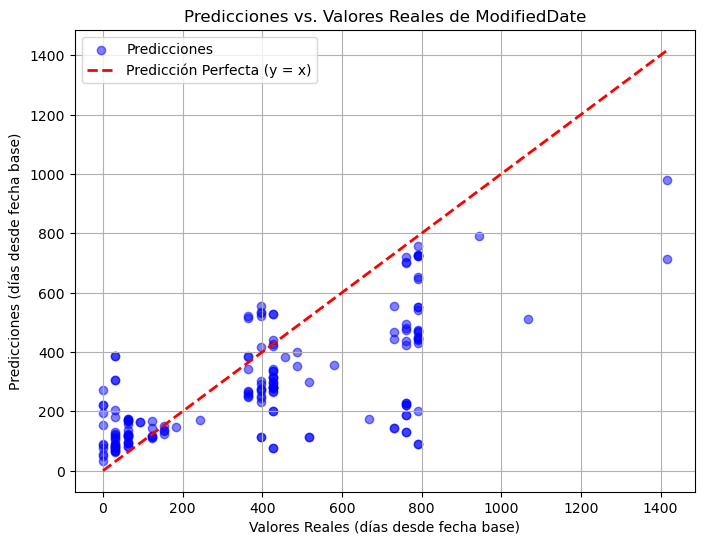

In [41]:
plt.figure(figsize = (8, 6))

plt.scatter(y_test, y_pred, alpha = 0.5, label = 'Predicciones', color = 'blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth = 2, label = 'Predicción Perfecta (y = x)')
plt.xlabel('Valores Reales (días desde fecha base)')
plt.ylabel('Predicciones (días desde fecha base)')
plt.title('Predicciones vs. Valores Reales de ModifiedDate')

plt.legend()
plt.grid(True)

plt.show()

In [42]:
import pickle

In [43]:
# Guardar el modelo entrenado
with open('modelo_modifieddate.pkl', 'wb') as file:
    pickle.dump(model, file)